In [46]:
from sklearn.datasets import load_diabetes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



diabets_data = load_diabetes()

dir(diabets_data)



['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [47]:


data = pd.DataFrame(data=diabets_data.data, columns=diabets_data.feature_names )


data['measure'] = diabets_data.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [48]:
pd.isnull(data).any()

age        False
sex        False
bmi        False
bp         False
s1         False
s2         False
s3         False
s4         False
s5         False
s6         False
measure    False
dtype: bool

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  measure  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


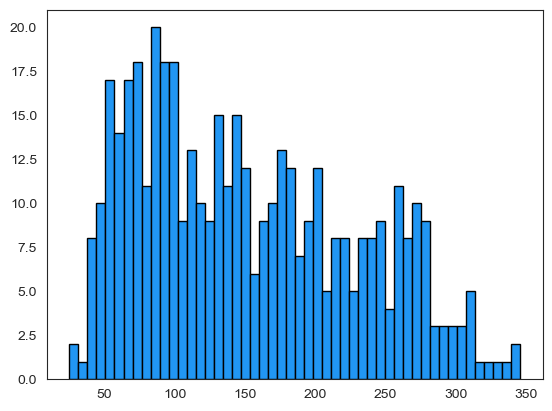

In [50]:
plt.hist(x=data['measure'], bins=50, ec='black' , color="#2196f3")
plt.show()

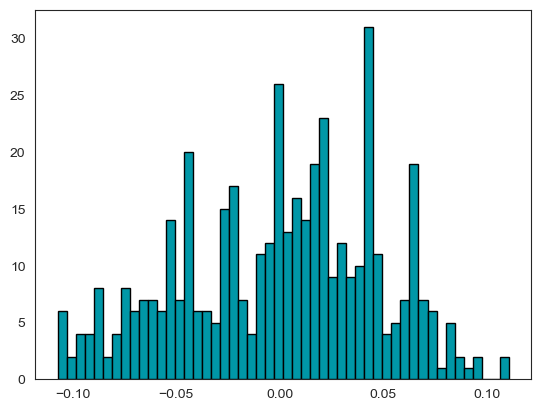

In [51]:
plt.hist(x=data['age'], bins=50, ec='black' , color="#0097A7")
plt.show()

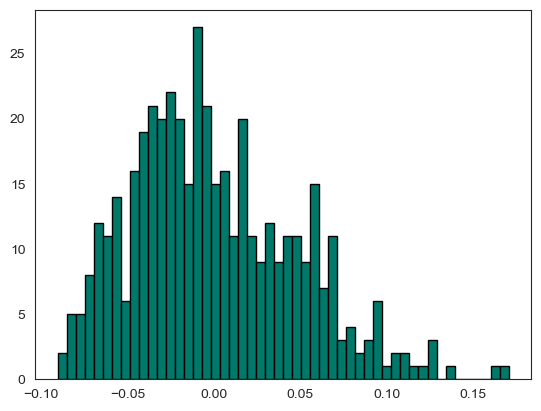

In [52]:
plt.hist(x=data['bmi'], bins=50, ec='black' , color="#00796B")
plt.show()

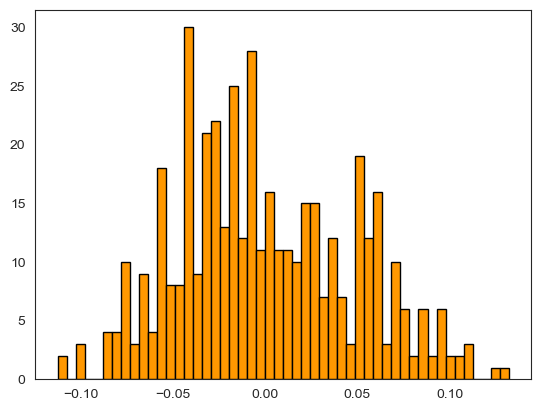

In [53]:
plt.hist(x=data['bp'], bins=50, ec='black' , color="#FF9800")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


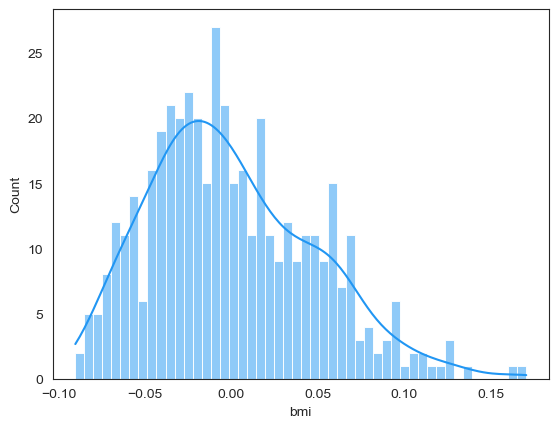

In [54]:
sns.histplot(data['bmi'], kde=True, color="#2196F3", bins=50 )
plt.show()

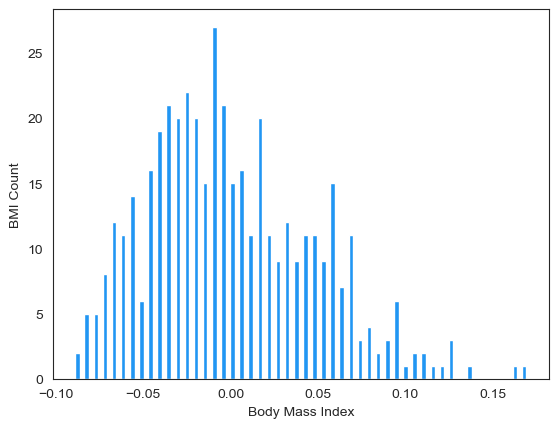

In [55]:
plt.hist(data['bmi'], color="#2196F3", bins=50, rwidth=0.5 )
plt.xlabel("Body Mass Index")
plt.ylabel("BMI Count")
plt.show()

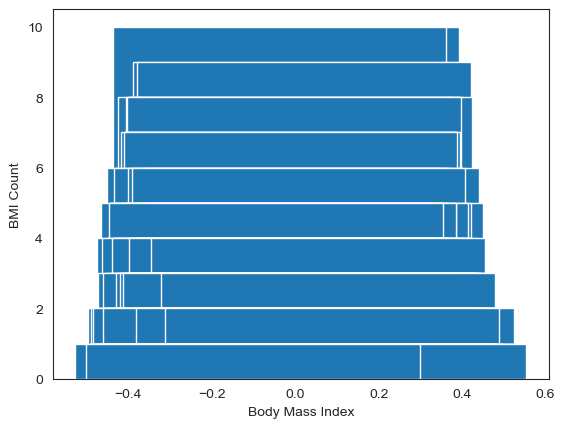

In [56]:
frequency = data['s1'].value_counts()
plt.bar(x=frequency.index, height=frequency )
plt.xlabel("Body Mass Index")
plt.ylabel("BMI Count")
plt.show()

In [57]:
data['measure'].min()

25.0

In [58]:
data['measure'].max()

346.0

In [59]:
data['measure'].mean()

152.13348416289594

In [60]:
data.mean()

age       -1.444295e-18
sex        2.543215e-18
bmi       -2.255925e-16
bp        -4.854086e-17
s1        -1.428596e-17
s2         3.898811e-17
s3        -6.028360e-18
s4        -1.788100e-17
s5         9.243486e-17
s6         1.351770e-17
measure    1.521335e+02
dtype: float64

In [61]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## $$\rho _{XY} = corr(X, Y) $$
## $$-1.0 \leq \rho _{X, Y} \leq 1.0 $$

In [62]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [63]:
data['measure'].corr(data['sex'])

0.043061998451605375

In [64]:
mask = np.zeros_like(data.corr())

triangle_indeces = np.tril_indices_from(mask)

mask[triangle_indeces] = True

mask


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


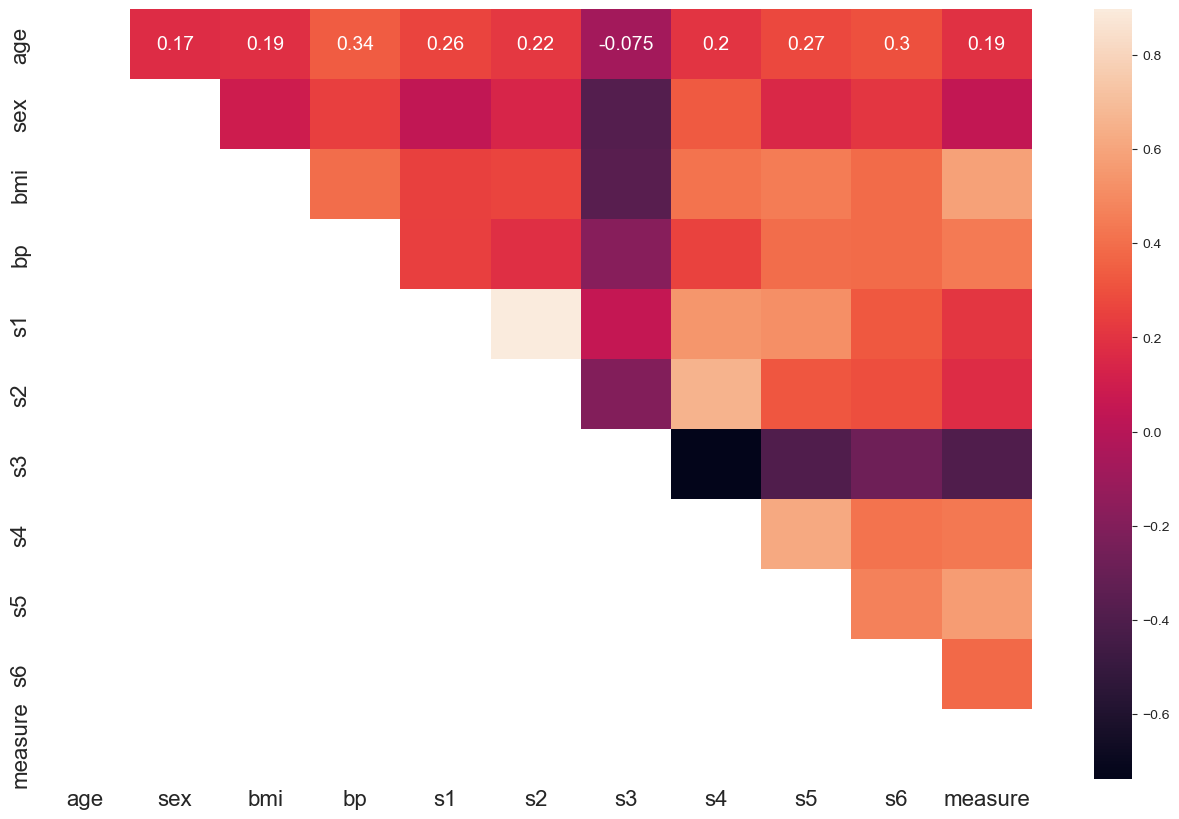

In [65]:
plt.figure(figsize=[16, 10])
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [66]:
from sklearn.datasets import fetch_openml

# Load Boston Housing dataset
boston = fetch_openml(name='boston', version=1)

# Extract features and target
X = boston.data
y = boston.target



/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [67]:
data1 = pd.DataFrame(data=boston.data, columns=boston.feature_names )


data1['price'] = boston.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [68]:
mask = np.zeros_like(data1.corr())

triangle_indeces = np.tril_indices_from(mask)

mask[triangle_indeces] = True

mask


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


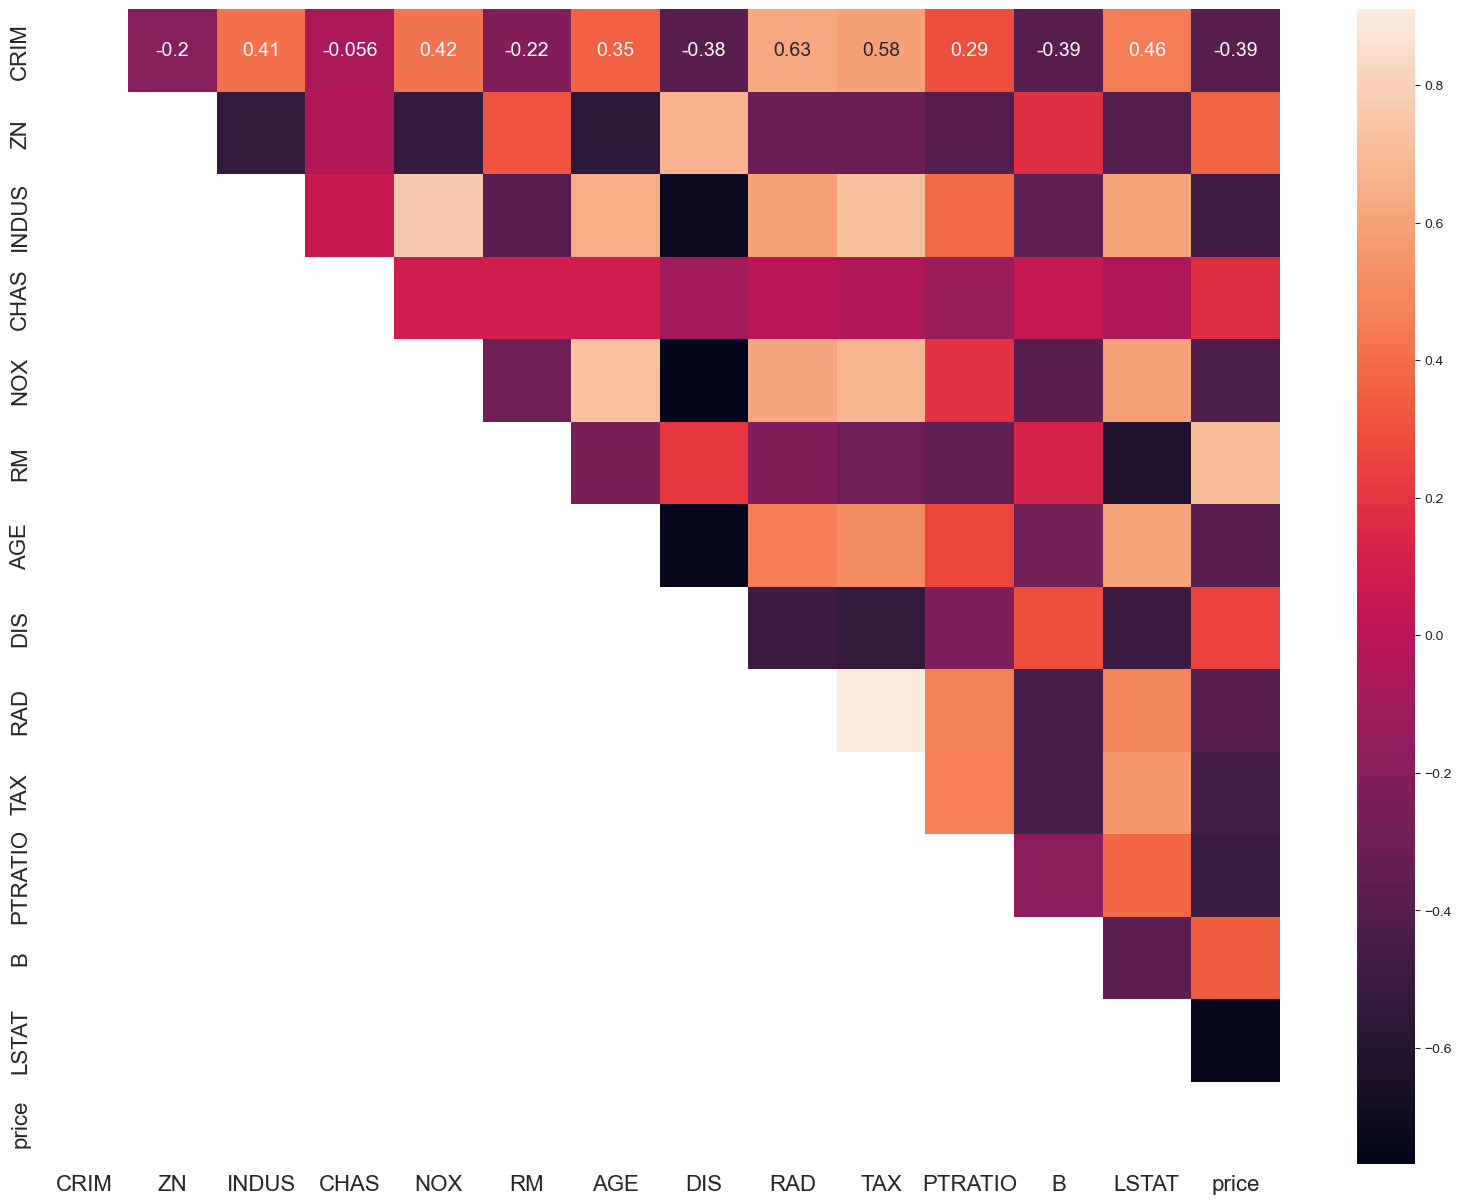

In [69]:
plt.figure(figsize=[20, 15])
sns.heatmap(data1.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

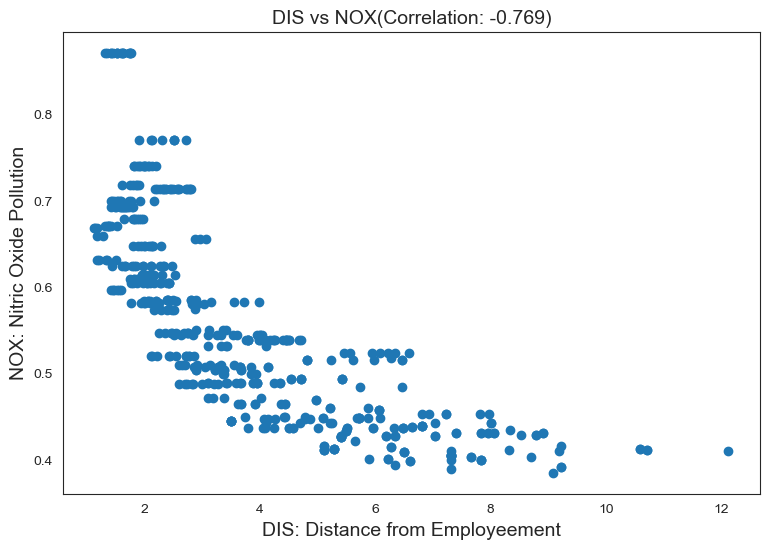

In [70]:
correalation_measure = round(data1['DIS'].corr(data1['NOX']), 3)

plt.figure(figsize=[9, 6])
plt.scatter(data1['DIS'], data1['NOX'])
plt.xlabel("DIS: Distance from Employeement", fontsize=14)
plt.ylabel("NOX: Nitric Oxide Pollution", fontsize=14)
plt.title(f"DIS vs NOX(Correlation: {correalation_measure})", fontsize=14)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


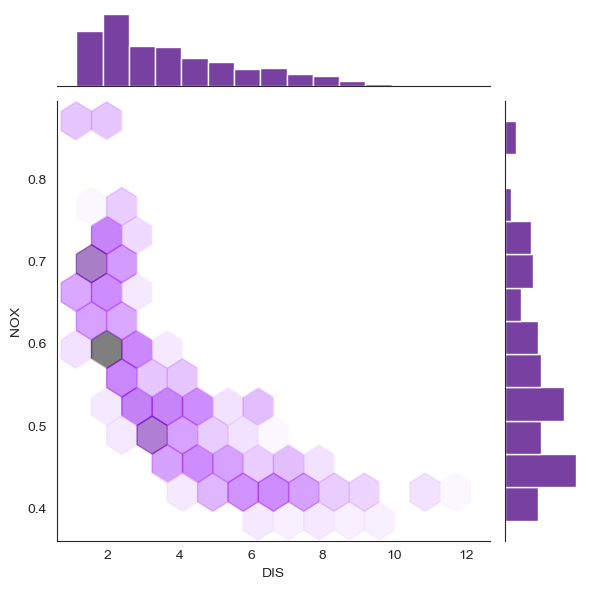

In [71]:
sns.jointplot(x=data1['DIS'], y=data1['NOX'], joint_kws={'alpha': 0.5}, color='indigo',  kind='hex')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


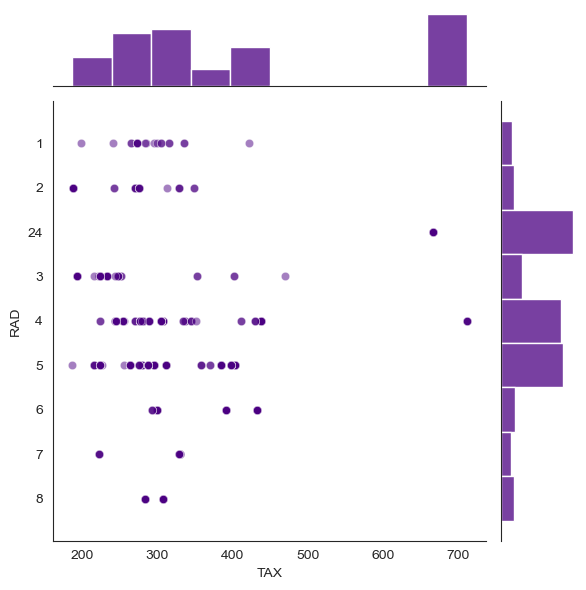

In [72]:
sns.jointplot(x=data1['TAX'], y=data1['RAD'], joint_kws={'alpha': 0.5}, color='indigo',  )
plt.show()

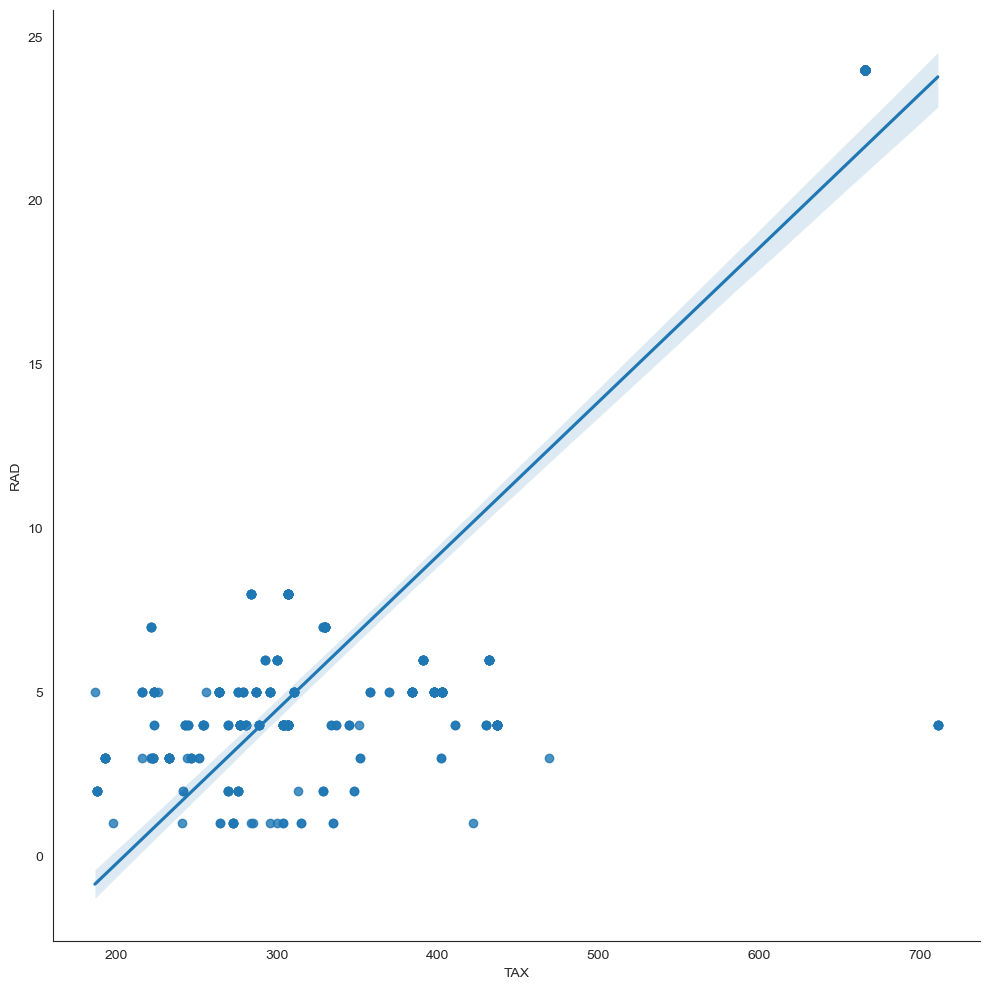

In [73]:

data1["TAX"] = pd.to_numeric(data1["TAX"], errors="coerce")
data1["RAD"] = pd.to_numeric(data1["RAD"], errors="coerce")

# Example: Check for missing values and drop them
data1.dropna(subset=["TAX", "RAD"], inplace=True)

sns.lmplot(x="TAX", y="RAD", data=data1, height=10)

# Show the plot
plt.show()

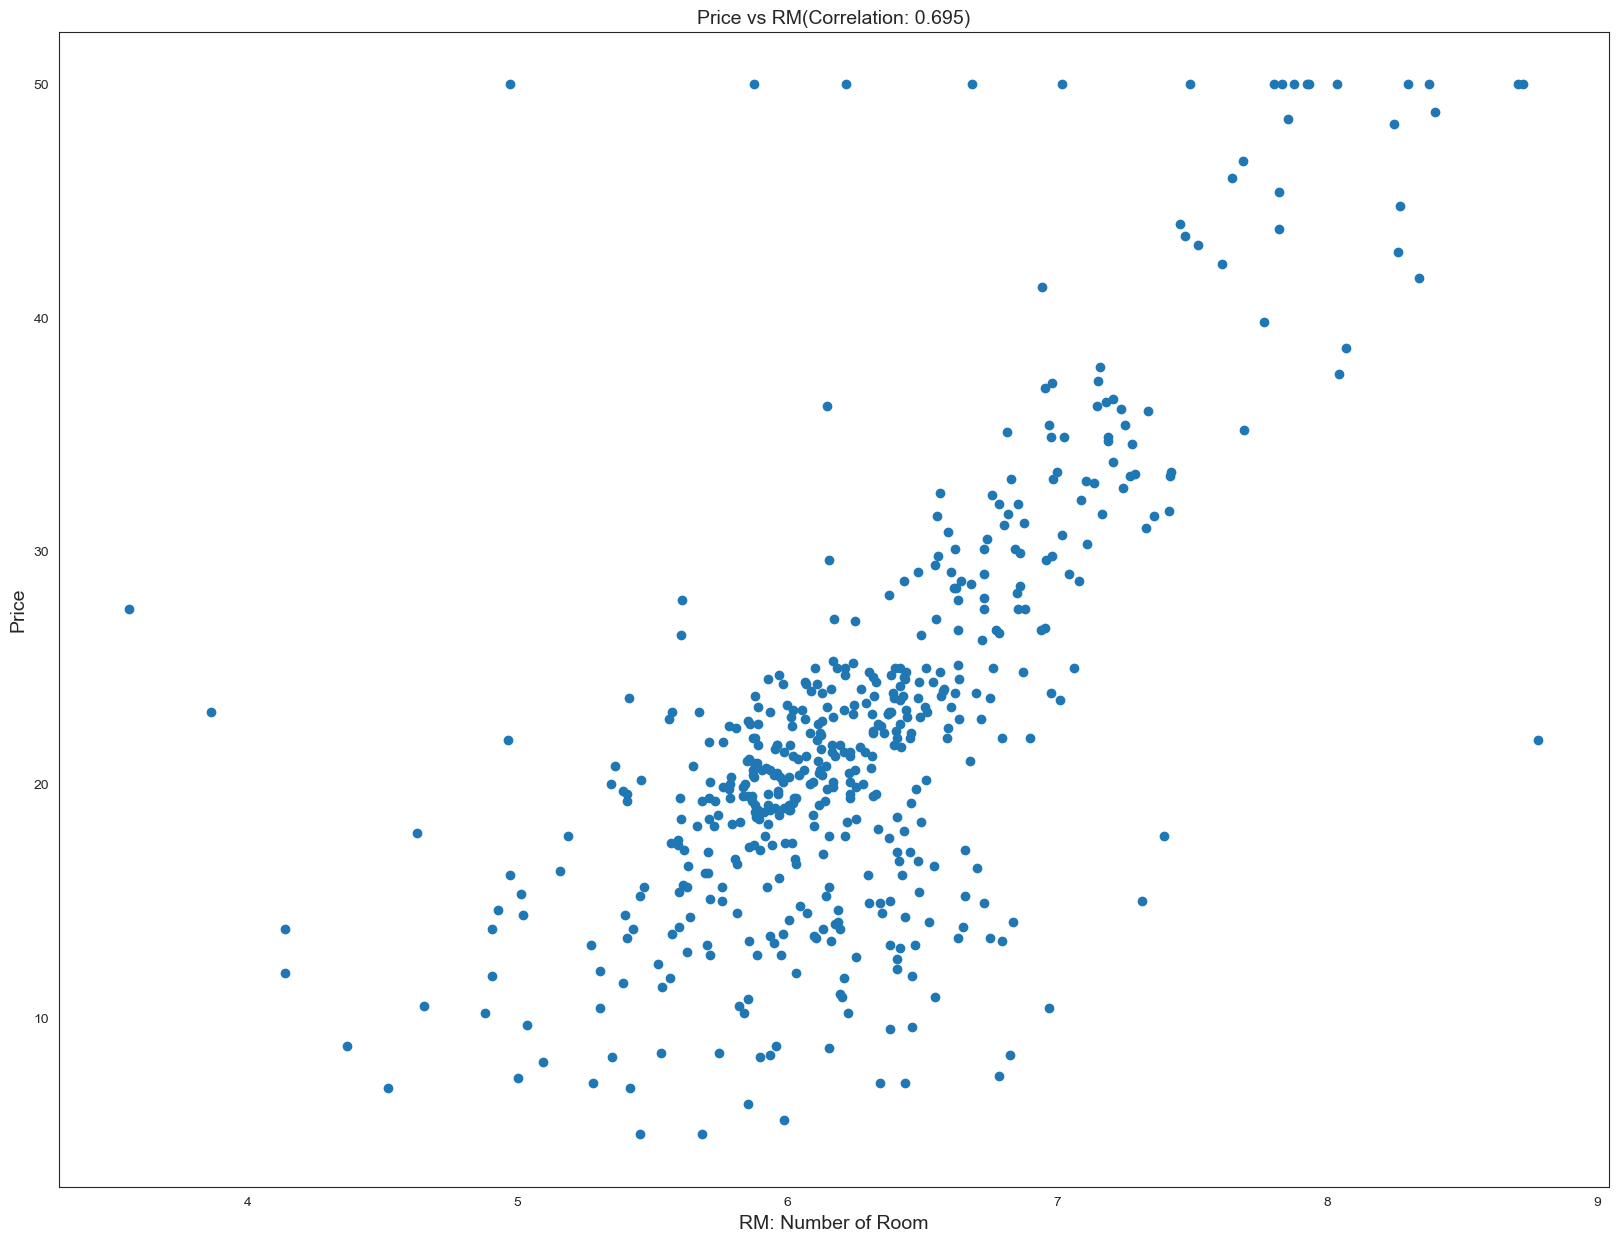

In [74]:
rm_trg_corr = round(data1['RM'].corr(data1['price']), 3)

plt.figure(figsize=[20, 15])
plt.scatter(data1['RM'], data1['price'])
plt.xlabel("RM: Number of Room", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title(f"Price vs RM(Correlation: {rm_trg_corr})", fontsize=14)
plt.show()




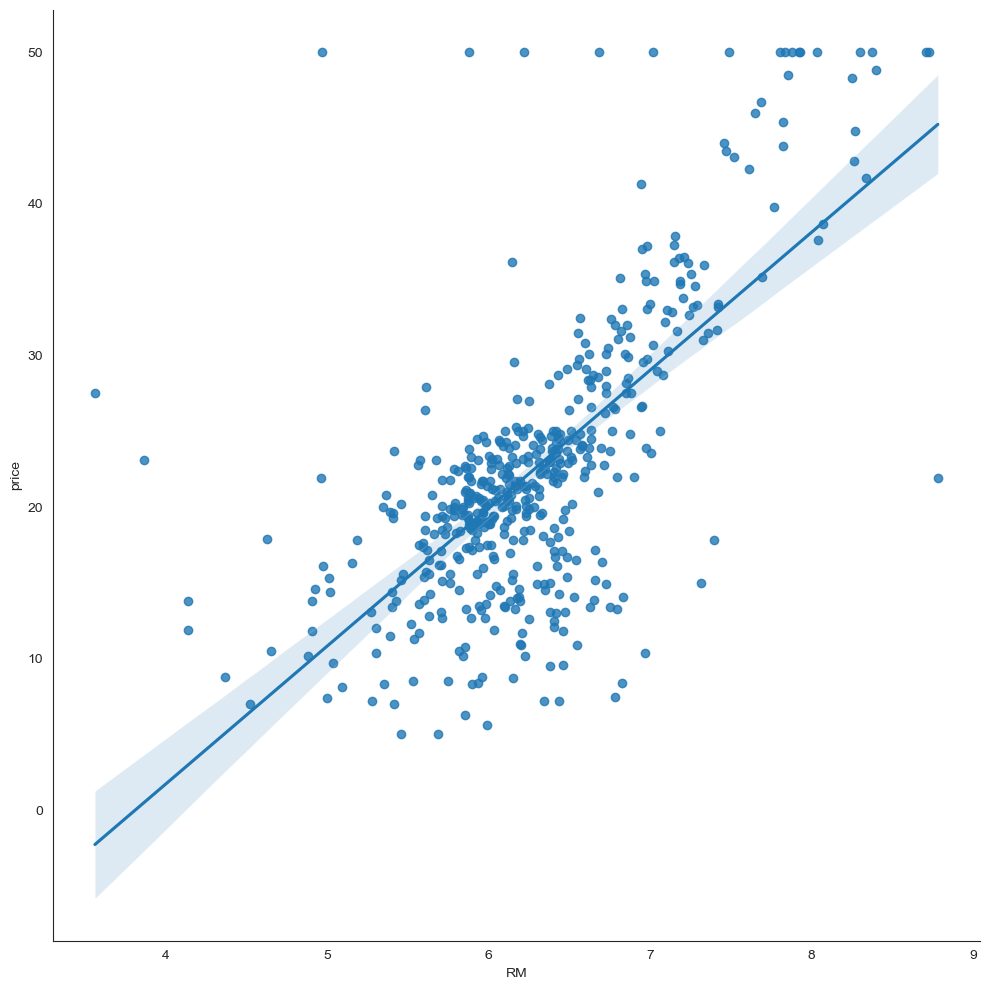

In [75]:
sns.lmplot(data=data1, x="RM", y='price', height=10)
plt.show()

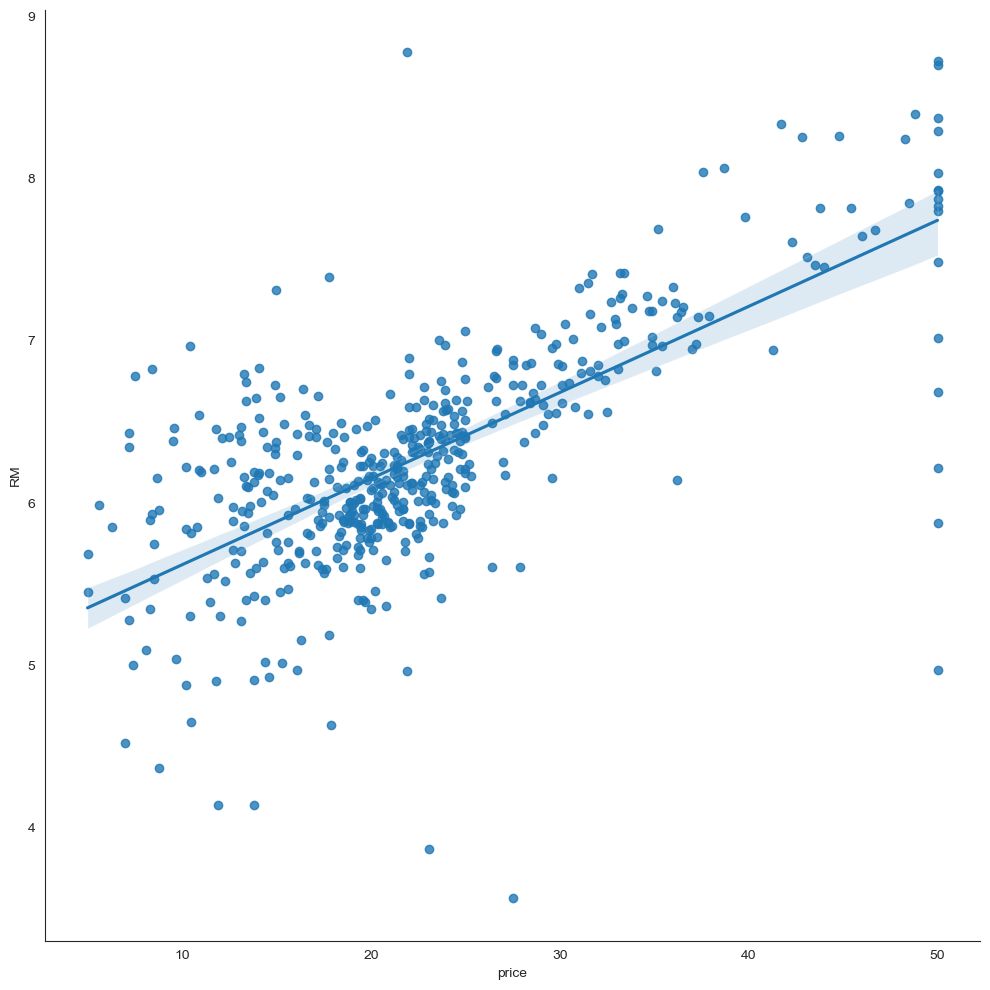

In [76]:

data1["TAX"] = pd.to_numeric(data1["TAX"], errors="coerce")
data1["RAD"] = pd.to_numeric(data1["RAD"], errors="coerce")

# Example: Check for missing values and drop them
data1.dropna(subset=["TAX", "RAD"], inplace=True)

sns.lmplot(x="price", y="RM", data=data1, height=10)

# Show the plot
plt.show()

In [77]:
# %%time
# sns.pairplot(data1)
# plt.show()


In [78]:
# %%time 
# sns.pairplot(data1, kind='reg', plot_kws={'line_kws': {'color': 'cyan'}})
# plt.show()

In [79]:
price = data['measure']
features = data.drop('measure', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)




In [80]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print("intercept: ", regr.intercept_)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))


pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Ceof'] )




intercept:  152.2555384904859
Training data r-squared: 0.5122948233206475
Test data r-squared: 0.5341988244945841


,Ceof
age,-3.887335
sex,-225.625278
bmi,517.904381
bp,328.310294
s1,-727.202888
s2,410.947848
s3,80.254704
s4,218.181524
s5,704.266137
s6,40.023307


In [81]:
data1['price'].skew()

1.1080984082549072

In [82]:
y_log = np.log(data1['price'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: price, dtype: float64

In [83]:
y_log.skew()

-0.33032129530987864

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


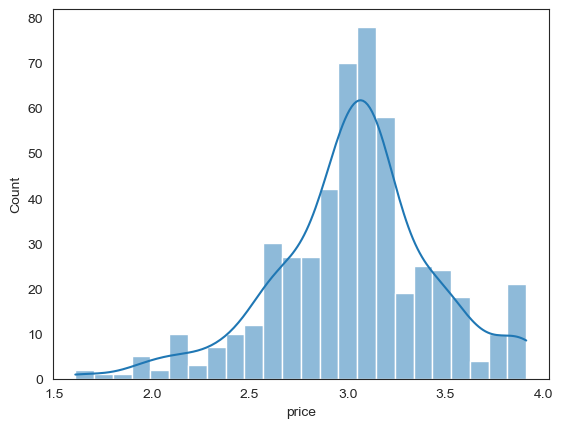

In [84]:
sns.histplot(y_log, kde=True)
plt.show()

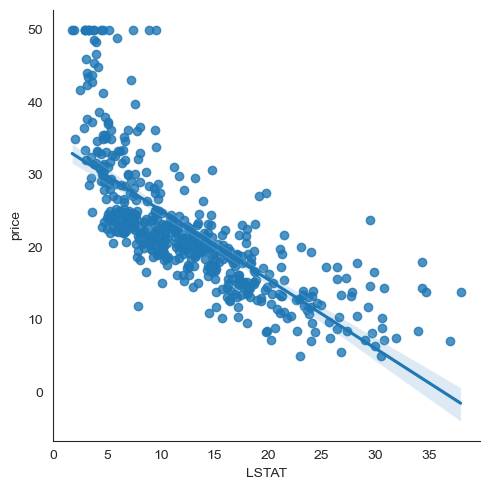

In [85]:

sns.lmplot(x='LSTAT', y='price', data=data1 )


plt.show()

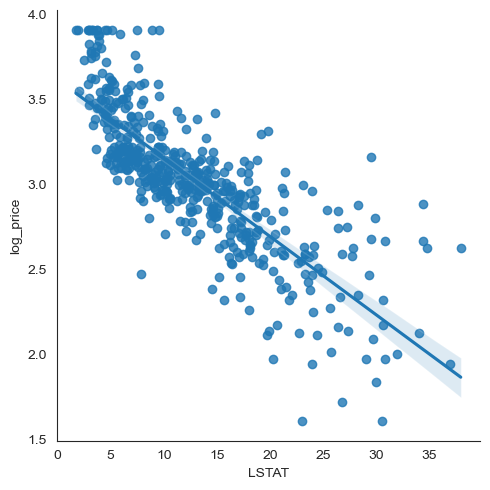

In [86]:
properties = data1.drop('price', axis=1)

transformed_data = properties
transformed_data['log_price'] = y_log;


sns.lmplot(x="LSTAT", y="log_price", data=transformed_data)
plt.show()




In [146]:
X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inc_const)

results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues) })


,coef,p-value
const,152.255538,0.0
age,-3.887335,1.0
sex,-225.625278,0.0
bmi,517.904381,0.0
bp,328.310294,0.0
s1,-727.202888,0.0
s2,410.947848,0.0
s3,80.254704,1.0
s4,218.181524,0.0
s5,704.266137,0.0


## Test for MultiCollinearity
$$ TAX = \alpha _{0} + \alpha _{1}RM + \alpha _{2}NOX + ... + \alpha _{12}LATST $$
$$ VIF_{TAX} = \frac {1} {(1 - R _{TAX}^2)}  $$


In [88]:
variance_inflation_factor(exog=X_inc_const, exog_idx=1 )

1.2682797196838178

In [89]:
len(X_inc_const.columns)

11

In [108]:
for i in range(len(X_inc_const.columns)):
    print (f"{X_inc_const.columns[i]}=> {variance_inflation_factor(exog=X_inc_const, exog_idx=i)}")

const=> 1.002745284065974
sex=> 1.2410262388446551
bmi=> 1.4871713430586035
bp=> 1.3921303624890953
s1=> 52.9508233809696
s2=> 34.22740808326249
s3=> 14.975985972114236
s4=> 8.976544269243728
s5=> 10.423506613066655
s6=> 1.4656592165244484


## Model Simplication & BIC

In [147]:
X_include_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_inc_const)

results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues )})

print('Result BIC: ', results.bic)
print("Result s-squared: ", results.rsquared)

Result BIC:  3874.571377454127
Result s-squared:  0.5122948233206475


In [148]:
X_incl_const = sm.add_constant(X_train)
X_inc_const = X_inc_const.drop([ 's1', 's2'], axis=1)

model = sm.OLS(y_train, X_inc_const)
results = model.fit()
coef_minus_index = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3 )})

print('Result BIC: ', results.bic)
print("Result s-squared: ", results.rsquared)

Result BIC:  3867.624866554683
Result s-squared:  0.5056368565323638
